In [1]:
import numpy as np 
import pandas as pd 



c:\Users\sahil\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Dataset 1 

In [2]:
df = pd.read_csv("option 1\malicious_phish.csv")

In [3]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
df.shape

(651191, 2)

In [5]:
df["type"].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [6]:
# Converting 'defacement','malware' to 'phishing'
# for i in range(len(df)):
#     if df['type'][i]!= 'benign':
#         df.loc[i,"type"]="phishing"
" time complexity is very high code is very slow"

' time complexity is very high code is very slow'

In [7]:
# Converting 'defacement','malware' to 'phishing'
# df['type']= df['type'].apply(lambda x:"phishing" if x!='benign' else 'benign')
df.loc[df['type'] !='benign','type'] = 'phishing'# O(1) time complexity

In [8]:
df['type'].value_counts()

type
benign      428103
phishing    223088
Name: count, dtype: int64

In [9]:
# Renaming Target Column so for concatination of dataframe
df.rename(columns={'type':'label'},inplace= True)

In [10]:
df

,url,label
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,phishing
4,http://adventure-nicaragua.net/index.php?optio...,phishing
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [11]:
df['label'].value_counts()

label
benign      428103
phishing    223088
Name: count, dtype: int64

## Dataset 2

In [12]:
df2 = pd.read_csv("option 2\\balanced_urls.csv")

In [13]:
df2.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [14]:
df2.shape

(632508, 3)

In [15]:
df2["label"].value_counts()

label
benign       316254
malicious    316254
Name: count, dtype: int64

In [16]:
df2['label'] = df2['label'].apply(lambda x:'phishing' if x!= 'benign' else 'benign')

In [17]:
# Removing unnecessary Column
df2.drop(["result"],axis=1,inplace=True)

In [18]:
df2

,url,label
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign
...,...,...
632503,xbox360.ign.com/objects/850/850402.html,phishing
632504,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
632505,www.gamespot.com/xbox360/action/deadspace/,phishing
632506,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


#### Concating DataFrames
so we have 3 methods
1) pd.concat --> Stacks dataframes on one another
2) pd.merge --> SQL-style join ( joins on only columns)
3) df.join  --> join on index or column

In [19]:
dt = pd.concat([df,df2],axis=0)

In [20]:
dt

,url,label
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,phishing
4,http://adventure-nicaragua.net/index.php?optio...,phishing
...,...,...
632503,xbox360.ign.com/objects/850/850402.html,phishing
632504,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
632505,www.gamespot.com/xbox360/action/deadspace/,phishing
632506,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [21]:
#after filtering, grouping, concatenating, or dropping rows, the index can become non-sequential or misaligned.
#reset_index() helps to rebuild the index from 0 to n-1.
dt = dt.reset_index(drop=True)
dt 

,url,label
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,phishing
4,http://adventure-nicaragua.net/index.php?optio...,phishing
...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [22]:
# Save as CSV
dt.to_csv("Base_Dataset.csv", index=False)   #index=False → prevents pandas from writing the row numbers as an extra column.


In [23]:
dt['label'].value_counts()

label
benign      744357
phishing    539342
Name: count, dtype: int64

## Feature Extraction

##### Feature1 - UrlLen
(Malicious URLs are often longer to hide payloads,redirections, or suspicious parameters.)

In [24]:
#x = dt['label'][0].str.len() 
            #not working here since str functionis only accessible for DataFrames not for single values  
#x = len(dt['label'][0])     
            #len function only counts float, int or truncated version of full string   
print(len(repr(dt['url'][0])))    
            #it counts every element in string even quotes or brackets also , escape charcters like \n   


18


In [25]:
dt['UrlLen']= dt['url'].apply(lambda x:len(repr(x))-2)

In [26]:
dt

,url,label,UrlLen
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235
...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45


#### Feature2-Entropy_URL
Entropy_URL helps detect obfuscated, random-looking, machine-generated URLs.  
URL like https://google.com/login → lower entropy (more readable, fewer unique characters).  
URL like https://x9g7fhz1.com/a8f1%23t2%24 → higher entropy (more symbols, more randomness).

In [27]:
## Entropy of URL
import math
from collections import Counter
# Counter is a class from the collections module that helps you count occurrences
#  of items in a list or string.
def calculate_entropy(url):
    if not url:
        return 0.0
    
    # Count frequency of each character
    char_counts = Counter(url)
    total_length = len(url)

    # Compute entropy
    entropy = -sum((count / total_length) * math.log2(count / total_length)
                   for count in char_counts.values())

    return entropy


In [28]:
"""Efficient entropy calculation for URL strings."""
import math

def Calculate_entropy(url: str) -> float:
    if not url:
        return 0.0
    
    freq = {}
    for char in url:
        freq[char] = freq.get(char, 0) + 1
    
    total_len = len(url)
    entropy = 0.0
    for count in freq.values():
        p = count / total_len
        entropy -= p * math.log2(p)
    
    return entropy


In [29]:
dt['URL_Entropy'] = dt['url'].apply(Calculate_entropy)


In [30]:
dt.head()

,url,label,UrlLen,URL_Entropy
0,br-icloud.com.br,phishing,16,3.375000
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293


### Feature 3:NoOfDots (provides no of dots in URL)
Separates subdomains and domain parts (so Too many dots may signal phshing)

In [31]:
# def Dots_count(string): #O(n),O(1)
#     count = 0
#     for i in string:
#         if i == ".":
#             count += 1
#     return count

In [32]:
Dots_count = lambda s:s.count(".")  #O(n),O(1)
#str.count() is implemented in Optimized C so its faster in practice
# so we will is use this

In [33]:
dt["NoOfDots"]= dt["url"].apply(Dots_count)

In [34]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots
0,br-icloud.com.br,phishing,16,3.375000,2
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2
...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2


#### NoOfSlashes (no of slashes in URL)
it might help us to find is it Copy the layout of real websites or is it legitimate 

In [35]:

Slashes_count = lambda s:s.count("/")

In [36]:
dt['NoOfSlashes']=dt['url'].apply(Slashes_count)

In [37]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes
0,br-icloud.com.br,phishing,16,3.375000,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3
...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2


#### IsIPaddressinDomain 
(IP address is used instead of a proper domain name in a URL is a critical indicator for phishing or malicious intent)

In [38]:
import re

# Precompile regex
ip_regex = re.compile(r'^(https?://)?(\d{1,3}\.){3}\d{1,3}([:/]?|$)')

def is_ip_address_in_domain(url):
    """
    Returns 1 if the domain of the URL is an IP address, else 0.
    """
    return 1 if ip_regex.match(url) else 0

In [39]:
dt['IsIpAddressinDomain'] = dt['url'].apply(is_ip_address_in_domain)

In [40]:
dt.head()


,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0


In [41]:
dt['IsIpAddressinDomain'].value_counts()

IsIpAddressinDomain
0    1255503
1      28196
Name: count, dtype: int64

def get_entropy(s):
    """Calculate Shannon entropy of a string."""
    if not s:
        return 0
    p, lns = Counter(s), float(len(s))
    return -sum(count / lns * math.log2(count / lns) for count in p.values())

def extract_url_features(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path
    query = parsed.query
    filename = path.split('/')[-1] if '/' in path else ''
    
    # 1. SymbolCount_URL
    symbol_count = len(re.findall(r'[^\w\s]', url))

    # 2. executable
    is_executable = int(bool(re.search(r'\.(exe|bat|zip|scr|msi|apk)$', filename.lower())))

    # 3. NumberRate_URL
    num_digits = sum(c.isdigit() for c in url)
    number_rate = num_digits / len(url) if len(url) > 0 else 0

    # 4. URL_sensitiveWord
    sensitive_words = ['login', 'secure', 'account', 'banking', 'update', 'verify']
    sensitive_word_flag = int(any(word in url.lower() for word in sensitive_words))

    # 5. Querylength
    query_length = len(query)

    # 6. argPathRatio
    arg_path_ratio = len(query) / len(path) if len(path) > 0 else 0

    # 7. charcompace (Character Complexity = unique chars / total chars)
    charcompace = len(set(url)) / len(url) if len(url) > 0 else 0

    # 8. CharacterContinuityRate (max sequence of same char / url length)
    max_seq = max((len(list(g)) for _, g in groupby(url)), default=1)
    continuity_rate = max_seq / len(url) if len(url) > 0 else 0

    # 9. Entropy_Domain
    domain_entropy = get_entropy(domain)

    # 10. Entropy_Filename
    filename_entropy = get_entropy(filename)

    # 11. pathurlRatio
    pathurl_ratio = len(path) / len(url) if len(url) > 0 else 0

    return pd.Series([
        symbol_count, is_executable, number_rate, sensitive_word_flag,
        query_length, arg_path_ratio, charcompace, continuity_rate,
        domain_entropy, filename_entropy, pathurl_ratio
    ])


In [42]:
# from collections import Counter
# import re

# def extract_sensitive_words(df, label_col='label', url_col='url', top_n=20):
#     phishing_urls = df[df[label_col] == 'phishing'][url_col]

#     # Tokenize URLs (splitting on /, ?, =, -, _, ., etc.)
#     tokens = []
#     for url in phishing_urls:
#         parts = re.split(r'[\/\?\=\-\_\.\&\:\;\%]', url.lower())
#         tokens.extend([token for token in parts if token.isalpha() and len(token) > 2])

#     # Count most common suspicious tokens
#     token_counts = Counter(tokens)
#     return [word for word, count in token_counts.most_common(top_n)]


In [43]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0
...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0


In [47]:
import re
from collections import Counter

def extract_sensitive_words_with_freq(df):
    # Tokenizer function inside
    def tokenize_url(url):
        # Split URL into words
        return [t for t in re.split(r'[\/\?\=\-\_\.\&\:\;\%]', url.lower()) if t and t.isalpha()]

    # Separate phishing vs benign URLs
    phishing_tokens = []
    benign_tokens = []
    
    for _, row in df.iterrows():
        tokens = tokenize_url(row['url'])
        if row['label'] == 'phishing':
            phishing_tokens.extend(tokens)
        else:
            benign_tokens.extend(tokens)
    
    # Count frequencies
    phishing_freq = Counter(phishing_tokens)
    benign_freq = Counter(benign_tokens)
    
    # Find sensitive words = words that appear more in phishing than benign
    sensitive_words = {}
    for word, count in phishing_freq.items():
        if count > benign_freq.get(word, 0):  
            sensitive_words[word] = count  
    
    return sensitive_words


In [48]:
sensitive_words = extract_sensitive_words_with_freq(dt)


In [49]:
sensitive_words 

{'br': 17339,
 'icloud': 252,
 'http': 369365,
 'pirenne': 82,
 'be': 3690,
 'index': 138424,
 'php': 143029,
 'option': 79675,
 'content': 57472,
 'view': 67509,
 'article': 44458,
 'id': 80324,
 'adventure': 320,
 'nicaragua': 236,
 'mailto': 8138,
 'tmpl': 22558,
 'component': 34045,
 'link': 8868,
 'pashminaonline': 34,
 'pashminas': 4,
 'ikenmijnkunst': 204,
 'nl': 16134,
 'exposities': 86,
 'lebensmittel': 212,
 'ueberwachung': 204,
 'de': 35746,
 'aktuelles': 370,
 'szabadmunkaero': 200,
 'hu': 2447,
 'cimoldal': 8,
 'start': 2857,
 'larcadelcarnevale': 158,
 'catalogo': 273,
 'palloncini': 2,
 'vnic': 156,
 'co': 21957,
 'signin': 2803,
 'eby': 171,
 'zukruygxctzmmqi': 2,
 'civpro': 166,
 'za': 2721,
 'marketingbyinternet': 44,
 'peluqueriadeautor': 196,
 'virtuemart': 6965,
 'page': 22137,
 'shop': 8882,
 'browse': 4297,
 'category': 17733,
 'itemid': 68458,
 'member': 795,
 'sportoption': 293,
 'uid': 739,
 'guest': 543,
 'langx': 395,
 'gb': 721,
 'raci': 208,
 'it': 13145,


In [50]:
import re

def add_sensitive_word_feature(df, sensitive_words):
    def tokenize_url(url):
        return [t for t in re.split(r'[\/\?\=\-\_\.\&\:\;\%]', url.lower()) if t and t.isalpha()]
    
    df['SensitiveWordCount'] = df['url'].apply(
        lambda url: sum(word in tokenize_url(url) for word in sensitive_words)
    )
    return df



In [51]:
dt = add_sensitive_word_feature(dt,sensitive_words)

KeyboardInterrupt: 

In [ ]:
abcd

In [ ]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,1
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,9
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,8
...,...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0,2
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0,1
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0,2
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0,1


In [ ]:
dt["SensitiveWordCount"].value_counts()

SensitiveWordCount
1     344133
4     282551
2     242481
3     153618
5     101490
0      39336
6      28829
10     20202
7      20028
8      19410
9      13816
11     11775
14      2454
13      2079
12      1316
15       176
16         5
Name: count, dtype: int64

In [ ]:
import pandas as pd
import re
import numpy as np
import math
from urllib.parse import urlparse
from collections import Counter
from itertools import groupby
from tqdm import tqdm

tqdm.pandas()  # enables progress bar with apply

def get_entropy(s):
    """Calculate Shannon entropy of a string."""
    if not s:
        return 0
    p, lns = Counter(s), float(len(s))
    return -sum(count / lns * math.log2(count / lns) for count in p.values())

def extract_url_features(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path
    query = parsed.query
    filename = path.split('/')[-1] if '/' in path else ''

    # 1. SymbolCount_URL
    symbol_count = len(re.findall(r'[^\w\s]', url))

    # 2. executable
    is_executable = int(bool(re.search(r'\.(exe|bat|zip|scr|msi|apk)$', filename.lower())))

    # 3. NumberRate_URL
    num_digits = sum(c.isdigit() for c in url)
    number_rate = num_digits / len(url) if len(url) > 0 else 0

    # 5. Querylength
    query_length = len(query)

    # 6. argPathRatio
    arg_path_ratio = len(query) / len(path) if len(path) > 0 else 0

    # 7. charcompace (Character Complexity = unique chars / total chars)
    charcompace = len(set(url)) / len(url) if len(url) > 0 else 0

    # 8. CharacterContinuityRate (max sequence of same char / url length)
    max_seq = max((len(list(g)) for _, g in groupby(url)), default=1)
    continuity_rate = max_seq / len(url) if len(url) > 0 else 0

    # 9. Entropy_Domain
    domain_entropy = get_entropy(domain)

    # 10. Entropy_Filename
    filename_entropy = get_entropy(filename)

    # 11. pathurlRatio
    pathurl_ratio = len(path) / len(url) if len(url) > 0 else 0

    return [
        symbol_count, is_executable, number_rate,
        query_length, arg_path_ratio, charcompace, continuity_rate,
        domain_entropy, filename_entropy, pathurl_ratio]
    


In [ ]:
feature_columns = [
    'SymbolCount_URL', 'executable', 'NumberRate_URL',
    'Querylength', 'argPathRatio', 'charcompace', 'CharacterContinuityRate',
    'Entropy_Domain', 'Entropy_Filename', 'pathurlRatio'
]

dt[feature_columns] = dt['url'].progress_apply(extract_url_features).apply(pd.Series)

  0%|          | 1686/1283699 [00:00<01:18, 16326.69it/s]

 70%|██████▉   | 897020/1283699 [00:33<00:14, 26792.05it/s]


KeyboardInterrupt: 

In [ ]:
dt.head()

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,Querylength,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,1,3.0,0.0,0.000000,0.0,0.0,0.687500,0.062500,0.000000,0.000000,1.000000
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,2,4.0,0.0,0.028571,0.0,0.0,0.542857,0.057143,0.000000,3.454822,1.000000
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,1,5.0,0.0,0.032258,0.0,0.0,0.483871,0.032258,0.000000,2.321928,1.000000
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,9,16.0,0.0,0.079545,49.0,4.9,0.352273,0.034091,3.308751,2.947703,0.113636
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,8,13.0,0.0,0.093617,194.0,19.4,0.251064,0.008511,3.501398,2.947703,0.042553


In [ ]:

def extract_url_features1(df):
    # 1. HasRedirection
    df['HasRedirection'] = df['url'].apply(lambda x: 1 if '//' in x.split('//', 1)[-1] else 0)

    # 2. HasAtSymbol
    df['HasAtSymbol'] = df['url'].apply(lambda x: 1 if '@' in x else 0)

    # 3. HasHyphenInDomain
    df['HasHyphenInDomain'] = df['url'].apply(lambda x: 1 if '-' in urlparse(x).netloc else 0)
    return df

    # 4. NumSubDomains

def count_subdomains(url):
    try:
        hostname = urlparse(url).hostname
        if hostname:
            return max(0, hostname.count('.') - 1)  # clamp at 0
        return 0
    except:
        return 0

dt['NumSubDomains'] = dt['url'].apply(count_subdomains)


In [ ]:
dt = extract_url_features1(dt)


In [ ]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,...,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,1,3.0,0.0,...,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,2,4.0,0.0,...,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,1,5.0,0.0,...,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,9,16.0,0.0,...,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,8,13.0,0.0,...,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0,2,6.0,0.0,...,0.0,0.589744,0.025641,0.000000,3.277613,1.000000,0,0,0,0
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0,1,8.0,0.0,...,0.0,0.500000,0.022727,0.000000,0.000000,1.000000,0,0,0,0
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0,2,6.0,0.0,...,0.0,0.476190,0.071429,0.000000,0.000000,1.000000,0,0,0,0
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0,1,6.0,0.0,...,0.0,0.466667,0.022222,0.000000,3.675311,1.000000,0,0,0,0


In [ ]:
dt.head()

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,...,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,1,3.0,0.0,...,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,2,4.0,0.0,...,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,1,5.0,0.0,...,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,9,16.0,0.0,...,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,8,13.0,0.0,...,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1


### SSL Certificate Check
what it does : Verifies if the site uses a valid and trusted SSL Certificate    
what it matters: Most phishing sites dont bother with proper certificates or use self 

In [ ]:
# import ssl, socket

# def has_valid_ssl(domain):
#     context = ssl.create_default_context()
#     try:
#         with socket.create_connection((domain, 443), timeout=5) as sock:
#             with context.wrap_socket(sock, server_hostname=domain) as ssock:
#                 cert = ssock.getpeercert()
#                 return True
#     except:
#         return False


In [ ]:
# dt['has_valid_ssl'] =dt['url'].apply(has_valid_ssl)

In [ ]:

# import whois
# from datetime import datetime

# def get_domain_age(domain):
#     try:
#         w = whois.whois(domain)
#         creation_date = w.creation_date
#         if isinstance(creation_date, list):
#             creation_date = creation_date[0]
#         return (datetime.now() - creation_date).days
#     except:
#         return -1  # Unable to fetch


In [ ]:
#dt['has_valid_ssl'] =dt['url'].apply(has_valid_ssl)

In [ ]:
dt.head

<bound method NDFrame.head of                                                        url     label  UrlLen  \
0                                         br-icloud.com.br  phishing      16   
1                      mp3raid.com/music/krizz_kaliko.html    benign      35   
2                          bopsecrets.org/rexroth/cr/1.htm    benign      31   
3        http://www.garage-pirenne.be/index.php?option=...  phishing      88   
4        http://adventure-nicaragua.net/index.php?optio...  phishing     235   
...                                                    ...       ...     ...   
1283694            xbox360.ign.com/objects/850/850402.html  phishing      39   
1283695       games.teamxbox.com/xbox-360/1860/Dead-Space/  phishing      44   
1283696         www.gamespot.com/xbox360/action/deadspace/  phishing      42   
1283697      en.wikipedia.org/wiki/Dead_Space_(video_game)  phishing      45   
1283698          www.angelfire.com/goth/devilmaycrytonite/  phishing      41   

         

In [ ]:
dt.drop("url",axis=1,inplace=True)

In [ ]:
dt['label'].value_counts()

label
benign      744357
phishing    539342
Name: count, dtype: int64

In [ ]:
dt['label'] = dt['label'].map({'phishing':1,'benign':0})

In [ ]:
dt.head()

,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,...,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,1,16,3.375000,2,0,0,1,3.0,0.0,0.000000,...,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,0,35,4.079143,2,2,0,2,4.0,0.0,0.028571,...,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,0,31,3.708093,2,3,0,1,5.0,0.0,0.032258,...,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,1,88,4.660343,3,3,0,9,16.0,0.0,0.079545,...,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,1,235,5.491293,2,3,0,8,13.0,0.0,0.093617,...,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1


In [ ]:
X = dt.drop('label',axis=1)
y = dt['label']

In [ ]:
X

,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,Querylength,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,16,3.375000,2,0,0,1,3.0,0.0,0.000000,0.0,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,35,4.079143,2,2,0,2,4.0,0.0,0.028571,0.0,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,31,3.708093,2,3,0,1,5.0,0.0,0.032258,0.0,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,88,4.660343,3,3,0,9,16.0,0.0,0.079545,49.0,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,235,5.491293,2,3,0,8,13.0,0.0,0.093617,194.0,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283694,39,4.355539,3,3,0,2,6.0,0.0,0.307692,0.0,0.0,0.589744,0.025641,0.000000,3.277613,1.000000,0,0,0,0
1283695,44,4.243300,2,4,0,1,8.0,0.0,0.159091,0.0,0.0,0.500000,0.022727,0.000000,0.000000,1.000000,0,0,0,0
1283696,42,4.147921,2,4,0,2,6.0,0.0,0.071429,0.0,0.0,0.476190,0.071429,0.000000,0.000000,1.000000,0,0,0,0
1283697,45,4.102313,2,2,0,1,6.0,0.0,0.000000,0.0,0.0,0.466667,0.022222,0.000000,3.675311,1.000000,0,0,0,0


In [ ]:
y

0          1
1          0
2          0
3          1
4          1
          ..
1283694    1
1283695    1
1283696    1
1283697    1
1283698    1
Name: label, Length: 1283699, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7621313390979201
[[158957  27089]
 [ 49249  85630]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.81    186046
           1       0.76      0.63      0.69    134879

    accuracy                           0.76    320925
   macro avg       0.76      0.74      0.75    320925
weighted avg       0.76      0.76      0.76    320925



In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# param_grid = [
#     {'solver': ['lbfgs', 'newton-cg', 'sag'], 'penalty': ['l2'], 'C': [0.1, 1, 10]},
#     {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
#     {'solver': ['saga'], 'penalty': ['elasticnet'], 'C': [0.1, 1, 10], 'l1_ratio': [0.5, 0.7, 0.9]},
#     {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
# ]

# grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)

# print("Best Params:", grid.best_params_)
# print("Best Score:", grid.best_score_)

In [ ]:
# from sklearn.naive_bayes import GaussianNB     # For continuous features (assumes normal distribution)
# from sklearn.naive_bayes import MultinomialNB  # For count data (e.g., text classification)
# from sklearn.naive_bayes import BernoulliNB    # For binary/boolean features
# from sklearn.naive_bayes import CategoricalNB 

In [ ]:
# GNB = GaussianNB()
# MNB = MultinomialNB()
# BNB = BernoulliNB() 
# CNB = CategoricalNB()

In [ ]:
# GNB.fit(X_train,y_train)
# y_pred2 = GNB.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(classification_report(y_test,y_pred2))
# output 0.6691220690192412

In [ ]:

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train_scaled, y_train)
# y_pred3 = MNB.predict(X_test_scaled)

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# print(accuracy_score(y_test, y_pred3))
# print(confusion_matrix(y_test, y_pred3))
# print(classification_report(y_test, y_pred3))
# 0.6550097374776038


In [ ]:
# BNB.fit(X_train,y_train)
# y_pred3 = BNB.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(classification_report(y_test,y_pred3))

In [ ]:
# CNB.fit(X_train_scaled,y_train)
# y_pred4 = CNB.predict(X_test_scaled)
# print(accuracy_score(y_test,y_pred4))
# print(confusion_matrix(y_test,y_pred4))
# print(classification_report(y_test,y_pred4))
# 0.6518781646802212

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is in a pandas DataFrame called df
# (If it's numpy array, I’ll show that too below)

# 1. Check if any column contains negative values
negative_cols = dt.columns[(dt < 0).any()].tolist()
print("Columns with negative values:", negative_cols)

# 2. Count of negative values per column
neg_counts = (dt < 0).sum()
print("\nCount of negative values in each column:\n", neg_counts[neg_counts > 0])

# 3. If dataset is NumPy array (say X_train)
neg_features = np.where((X_train < 0).any(axis=0))[0]
print("\nFeature indices with negative values:", neg_features)


Columns with negative values: []

Count of negative values in each column:
 Series([], dtype: int64)

Feature indices with negative values: []


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth= 44,min_samples_leaf =1,min_samples_split = 2)

In [ ]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=44)

In [ ]:
y_pred5 = DecisionTree.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

0.9639604268910181
[[178589   7457]
 [  4109 130770]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    186046
           1       0.95      0.97      0.96    134879

    accuracy                           0.96    320925
   macro avg       0.96      0.96      0.96    320925
weighted avg       0.96      0.96      0.96    320925



In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
train_acc = DecisionTree.score(X_train, y_train)
test_acc = DecisionTree.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.998370334055552
Testing Accuracy: 0.9639604268910181


In [ ]:
! pip install joblib

In [ ]:
import joblib
# save model 
joblib.dump(DecisionTree,"DecisionTree.joblib")

['DecisionTree.joblib']

In [ ]:
DecisionTree.feature_importances_
#IsIpAddressinDomain,executable,HasRedirection,HasAtSymbol as per Decision Tree this features are not contributing much

array([0.02491047, 0.04259341, 0.08781613, 0.07905032, 0.00073008,
       0.28390919, 0.03849443, 0.00031655, 0.03187188, 0.00665847,
       0.00378957, 0.01916494, 0.12521924, 0.11473203, 0.04756553,
       0.01973266, 0.06950177, 0.00030489, 0.00039751, 0.00324093])

In [ ]:
## check correlation between features
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from scipy.stats import randint

# # Example: random distributions instead of fixed grids
# param_dist = {
#     'max_depth': randint(5, 50),
#     'min_samples_split': randint(2, 50),
#     'min_samples_leaf': randint(1, 20),
#     'criterion': ['gini', 'entropy']
# }

# dt = DecisionTreeClassifier()
# random_search = RandomizedSearchCV(
#     estimator=dt,
#     param_distributions=param_dist,
#     n_iter=50,          # only 50 random combinations instead of all
#     cv=3,               # use 3-fold instead of 5 to save time
#     scoring='accuracy',
#     n_jobs=-1,          # parallel execution (use all cores)
#     random_state=42
# )

# random_search.fit(X, y)
# print("Best Params:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

# # output 
# Best Params: {'criterion': 'gini', 'max_depth': 43, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Best Score: 0.900987640161801

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# randint(low, high) defines a discrete uniform distribution over integers in the range [low, high).
# When used in hyperparameter tuning (like RandomizedSearchCV), it tells sklearn to sample random integers from that range for each trial.
param_dist = {
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']}

In [ ]:
# # Step 1: Use RandomizedSearch to get a "good region"
# random_search = RandomizedSearchCV(
#     dt, param_dist,
#     n_iter=200,  # more samples
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     n_jobs=-1,
#     error_score='raise'  # will stop at the first invalid combination
# )
# random_search.fit(X, y)

# # Step 2: Define a refined grid near the best result
# best = random_search.best_params_
# param_grid = {
#     'max_depth': range(best['max_depth']-2, best['max_depth']+3),
#     'min_samples_split': range(best['min_samples_split']-2, best['min_samples_split']+3),
#     'min_samples_leaf': range(best['min_samples_leaf']-2, best['min_samples_leaf']+3),
#     'criterion': [best['criterion']]
# }

# grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X, y)
# print("Final Best Params:", grid_search.best_params_)
# print("Final Best Score:", grid_search.best_score_)




# Final Best Params: {'criterion': 'gini', 'max_depth': 44, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Final Best Score: 0.9349652730309254

In [ ]:
y_proba = DecisionTree.predict_proba(X_test)[:,1]
y_pred_new = (y_proba>0.6).astype(int)

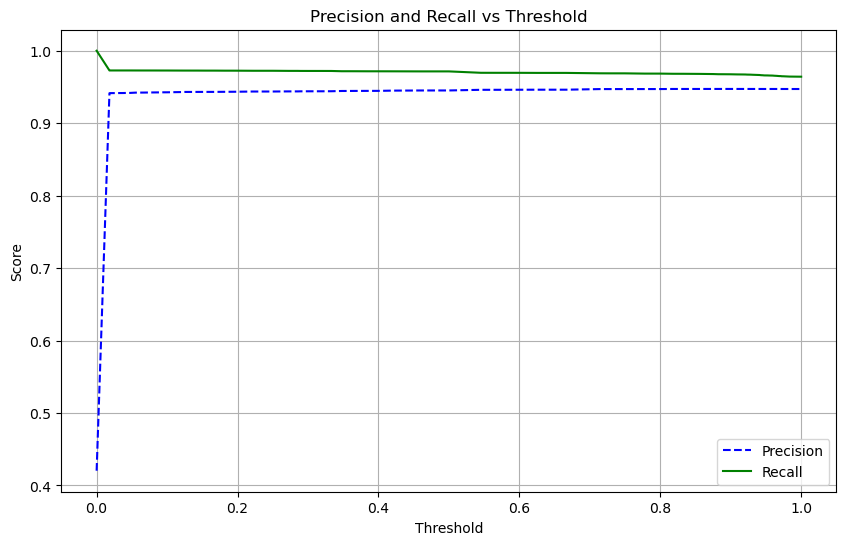

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 1. Get prediction probabilities for positive class
y_scores = DecisionTree.predict_proba(X_test)[:, 1]

# 2. Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# 3. Plot Precision and Recall vs Threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix

def find_best_threshold(y_true, y_scores, min_precision=None, strategy="f1"):
    """
    y_true: actual labels
    y_scores: predicted probabilities for positive class
    min_precision: optional, if you want precision >= some value (e.g. 0.95)
    strategy: "f1", "precision", or "recall"
    """
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    
    best_threshold = 0.5
    best_score = -1
    
    for t, p, r in zip(thresholds, precision[:-1], recall[:-1]):
        if min_precision and p < min_precision:
            continue  # skip if precision not high enough
        
        if strategy == "f1":
            score = 2 * (p * r) / (p + r) if (p + r) > 0 else 0
        elif strategy == "precision":
            score = p
        elif strategy == "recall":
            score = r
        else:
            raise ValueError("Unknown strategy")
        
        if score > best_score:
            best_score = score
            best_threshold = t
    
    # Final evaluation with chosen threshold
    y_pred = (y_scores >= best_threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    print(f"Best threshold = {best_threshold:.3f}")
    print(f"Precision = {precision[np.argmin(np.abs(thresholds - best_threshold))]:.3f}")
    print(f"Recall = {recall[np.argmin(np.abs(thresholds - best_threshold))]:.3f}")
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    
    return best_threshold


In [ ]:
# Get probabilities from your decision tree
y_scores = model.predict_proba(X_test)[:, 1]

# Example 1: Find threshold that maximizes F1
best_t = find_best_threshold(y_test, y_scores, strategy="f1")

# Example 2: Find threshold with precision >= 0.95
best_t = find_best_threshold(y_test, y_scores, min_precision=0.95)


Best threshold = 0.394
Precision = 0.673
Recall = 0.784
Confusion Matrix: TN=134778, FP=51268, FN=29198, TP=105681
Best threshold = 0.985
Precision = 0.950
Recall = 0.093
Confusion Matrix: TN=185385, FP=661, FN=122270, TP=12609


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Train model
# rf_model = RandomForestClassifier(
#     n_estimators=200, 
#     max_depth=None, 
#     random_state=42
# )
# rf_model.fit(X_train, y_train)

# y_pred6 = rf_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# print(accuracy_score(y_test,y_pred6))
# print(confusion_matrix(y_test,y_pred6))
# print(classification_report(y_test,y_pred6))

0.978007322583158
[[182073   3973]
 [  3085 131794]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    186046
           1       0.97      0.98      0.97    134879

    accuracy                           0.98    320925
   macro avg       0.98      0.98      0.98    320925
weighted avg       0.98      0.98      0.98    320925



In [ ]:
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.9984181126619539
Testing Accuracy: 0.978007322583158


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dataset in LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',        # for classification
    'boosting_type': 'gbdt',      # Gradient Boosting Decision Tree
    'metric': 'binary_logloss',   # or 'auc'
    'num_leaves': 31,             # controls complexity
    'learning_rate': 0.05,        # step size shrinkage
    'feature_fraction': 0.9,      # subsample features
    'bagging_fraction': 0.8,      # subsample rows
    'bagging_freq': 5,            # perform bagging every k iterations
    'n_jobs': -1,                 # use all CPU cores
    'verbose': -1
}

# Train model
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Define model
import lightgbm as lgb

# Create dataset
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Define parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'binary_logloss',
    'verbose': -1
}

# Train with early stopping via callbacks
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]
)

# Predictions
# Use validation set
y_pred = model.predict(X_val, num_iteration=model.best_iteration)

# Convert probabilities to binary labels
y_pred_labels = (y_pred > 0.5).astype(int)




Training until validation scores don't improve for 50 rounds
[100]	training's binary_logloss: 0.194637	valid_1's binary_logloss: 0.193804
[200]	training's binary_logloss: 0.166853	valid_1's binary_logloss: 0.166463
[300]	training's binary_logloss: 0.154402	valid_1's binary_logloss: 0.154617
[400]	training's binary_logloss: 0.14574	valid_1's binary_logloss: 0.1464
[500]	training's binary_logloss: 0.13939	valid_1's binary_logloss: 0.140696
[600]	training's binary_logloss: 0.134379	valid_1's binary_logloss: 0.136163
[700]	training's binary_logloss: 0.130153	valid_1's binary_logloss: 0.13246
[800]	training's binary_logloss: 0.126938	valid_1's binary_logloss: 0.129783
[900]	training's binary_logloss: 0.124099	valid_1's binary_logloss: 0.127466
[1000]	training's binary_logloss: 0.121377	valid_1's binary_logloss: 0.125306
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.121377	valid_1's binary_logloss: 0.125306


In [ ]:

print("Accuracy:", accuracy_score(y_val, y_pred_labels))
print(confusion_matrix(y_val, y_pred_labels))
print(classification_report(y_val, y_pred_labels))

Accuracy: 0.9547713640258627
[[144390   4450]
 [  7162 100738]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    148840
           1       0.96      0.93      0.95    107900

    accuracy                           0.95    256740
   macro avg       0.96      0.95      0.95    256740
weighted avg       0.95      0.95      0.95    256740



In [ ]:
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'n_jobs': -1,
    'verbose': -1
}


In [ ]:
from lightgbm import early_stopping, log_evaluation

model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=2000,
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(100)]
)




Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0630755
[200]	valid_0's binary_error: 0.0544753
[300]	valid_0's binary_error: 0.0498247
[400]	valid_0's binary_error: 0.0473125
[500]	valid_0's binary_error: 0.0457817
[600]	valid_0's binary_error: 0.0441965
[700]	valid_0's binary_error: 0.0427047
[800]	valid_0's binary_error: 0.0416842
[900]	valid_0's binary_error: 0.0410259
[1000]	valid_0's binary_error: 0.0402392
[1100]	valid_0's binary_error: 0.0394212
[1200]	valid_0's binary_error: 0.0389226
[1300]	valid_0's binary_error: 0.0383423
[1400]	valid_0's binary_error: 0.0379255
[1500]	valid_0's binary_error: 0.037462
[1600]	valid_0's binary_error: 0.0369829
[1700]	valid_0's binary_error: 0.0365779
[1800]	valid_0's binary_error: 0.0361728
[1900]	valid_0's binary_error: 0.035756
[2000]	valid_0's binary_error: 0.0354094
Did not meet early stopping. Best iteration is:
[1987]	valid_0's binary_error: 0.035386


In [ ]:
y_pred2 = model.predict(X_val, num_iteration=model.best_iteration)

# Convert probabilities to binary labels
y_pred_labels2 = (y_pred2 > 0.5).astype(int)


In [ ]:
print("Accuracy:", accuracy_score(y_val, y_pred_labels2))
print(confusion_matrix(y_val, y_pred_labels2))
print(classification_report(y_val, y_pred_labels2))

Accuracy: 0.9646140063877853
[[145157   3683]
 [  5402 102498]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    148840
           1       0.97      0.95      0.96    107900

    accuracy                           0.96    256740
   macro avg       0.96      0.96      0.96    256740
weighted avg       0.96      0.96      0.96    256740



In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_error',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10)
    }
    
    gbm = lgb.train(
        param,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)  # prints log every 100 rounds
        ]
    )
    
    preds = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    pred_labels = (preds > 0.5).astype(int)
    acc = accuracy_score(y_val, pred_labels)
    return acc

# Run Optuna
import optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best params:", study.best_trial.params)


[I 2025-08-19 17:01:49,578] A new study created in memory with name: no-name-e4b239b4-8bf3-4074-aa1e-7700df71c91f


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.050074
[200]	valid_0's binary_error: 0.0427125
[300]	valid_0's binary_error: 0.0395848
[400]	valid_0's binary_error: 0.0374581
[500]	valid_0's binary_error: 0.0357404
[600]	valid_0's binary_error: 0.034755
[700]	valid_0's binary_error: 0.0336683
[800]	valid_0's binary_error: 0.0327257
[900]	valid_0's binary_error: 0.032418
Early stopping, best iteration is:
[867]	valid_0's binary_error: 0.0322194


[I 2025-08-19 17:03:35,299] Trial 0 finished with value: 0.9677806341045415 and parameters: {'learning_rate': 0.19749262869774778, 'num_leaves': 135, 'max_depth': 7, 'feature_fraction': 0.78962000012304, 'bagging_fraction': 0.7626410368250196, 'bagging_freq': 7}. Best is trial 0 with value: 0.9677806341045415.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0594025
[200]	valid_0's binary_error: 0.0501753
[300]	valid_0's binary_error: 0.0459375
[400]	valid_0's binary_error: 0.0428449
[500]	valid_0's binary_error: 0.0408662
[600]	valid_0's binary_error: 0.0394329
[700]	valid_0's binary_error: 0.0381242
[800]	valid_0's binary_error: 0.0370336
[900]	valid_0's binary_error: 0.0362624
[1000]	valid_0's binary_error: 0.0356509
Did not meet early stopping. Best iteration is:
[999]	valid_0's binary_error: 0.0356431


[I 2025-08-19 17:06:10,690] Trial 1 finished with value: 0.9643569369790449 and parameters: {'learning_rate': 0.16618480150262954, 'num_leaves': 154, 'max_depth': 6, 'feature_fraction': 0.7066615282953943, 'bagging_fraction': 0.9731828471724624, 'bagging_freq': 2}. Best is trial 0 with value: 0.9677806341045415.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0591571
[200]	valid_0's binary_error: 0.0516086
[300]	valid_0's binary_error: 0.0471644
[400]	valid_0's binary_error: 0.0447184
[500]	valid_0's binary_error: 0.0431682
[600]	valid_0's binary_error: 0.0417816
[700]	valid_0's binary_error: 0.0405001
[800]	valid_0's binary_error: 0.039464
[900]	valid_0's binary_error: 0.0387785
[1000]	valid_0's binary_error: 0.0380463
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0380463


[I 2025-08-19 17:07:07,242] Trial 2 finished with value: 0.9619537275064267 and parameters: {'learning_rate': 0.04030631483055138, 'num_leaves': 108, 'max_depth': 11, 'feature_fraction': 0.6294122062173715, 'bagging_fraction': 0.5560718688463713, 'bagging_freq': 10}. Best is trial 0 with value: 0.9677806341045415.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0510516
[200]	valid_0's binary_error: 0.0432383
[300]	valid_0's binary_error: 0.0403365
[400]	valid_0's binary_error: 0.0386033
Early stopping, best iteration is:
[438]	valid_0's binary_error: 0.037984


[I 2025-08-19 17:07:43,043] Trial 3 finished with value: 0.9620160473630911 and parameters: {'learning_rate': 0.21363692207076185, 'num_leaves': 72, 'max_depth': 7, 'feature_fraction': 0.9977983389923544, 'bagging_fraction': 0.6709113122691183, 'bagging_freq': 2}. Best is trial 0 with value: 0.9677806341045415.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0443406
[200]	valid_0's binary_error: 0.0391953
[300]	valid_0's binary_error: 0.0364337
[400]	valid_0's binary_error: 0.0344824
[500]	valid_0's binary_error: 0.0330685
[600]	valid_0's binary_error: 0.0317052
[700]	valid_0's binary_error: 0.0305952
[800]	valid_0's binary_error: 0.0298239
[900]	valid_0's binary_error: 0.0289554
[1000]	valid_0's binary_error: 0.0280634
Did not meet early stopping. Best iteration is:
[999]	valid_0's binary_error: 0.0280284


[I 2025-08-19 17:09:32,976] Trial 4 finished with value: 0.9719716444652178 and parameters: {'learning_rate': 0.11006688678379632, 'num_leaves': 165, 'max_depth': 12, 'feature_fraction': 0.8735107339122374, 'bagging_fraction': 0.8855068699080222, 'bagging_freq': 9}. Best is trial 4 with value: 0.9719716444652178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0672626
[200]	valid_0's binary_error: 0.0587131
[300]	valid_0's binary_error: 0.0536029
[400]	valid_0's binary_error: 0.0505609
[500]	valid_0's binary_error: 0.0485277
[600]	valid_0's binary_error: 0.0471021
[700]	valid_0's binary_error: 0.0456065
[800]	valid_0's binary_error: 0.044882
[900]	valid_0's binary_error: 0.0442081
[1000]	valid_0's binary_error: 0.0435109
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0435109


[I 2025-08-19 17:10:29,905] Trial 5 finished with value: 0.9564890550751733 and parameters: {'learning_rate': 0.297712033583149, 'num_leaves': 66, 'max_depth': 4, 'feature_fraction': 0.6297230880471156, 'bagging_fraction': 0.6325558151484878, 'bagging_freq': 3}. Best is trial 4 with value: 0.9719716444652178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0710641
[200]	valid_0's binary_error: 0.0627561
[300]	valid_0's binary_error: 0.0586079
[400]	valid_0's binary_error: 0.0549973
[500]	valid_0's binary_error: 0.0522396
[600]	valid_0's binary_error: 0.0500506
[700]	valid_0's binary_error: 0.0483252
[800]	valid_0's binary_error: 0.046849
[900]	valid_0's binary_error: 0.0457272
[1000]	valid_0's binary_error: 0.0446872
Did not meet early stopping. Best iteration is:
[999]	valid_0's binary_error: 0.0446833


[I 2025-08-19 17:13:55,398] Trial 6 finished with value: 0.9553166627716756 and parameters: {'learning_rate': 0.01115898456650739, 'num_leaves': 163, 'max_depth': 13, 'feature_fraction': 0.5149986059580232, 'bagging_fraction': 0.6603906656639486, 'bagging_freq': 9}. Best is trial 4 with value: 0.9719716444652178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0710057
[200]	valid_0's binary_error: 0.0608865
[300]	valid_0's binary_error: 0.0557996
[400]	valid_0's binary_error: 0.052263
[500]	valid_0's binary_error: 0.0497585
[600]	valid_0's binary_error: 0.0481187
[700]	valid_0's binary_error: 0.0465412
[800]	valid_0's binary_error: 0.0452871
[900]	valid_0's binary_error: 0.044138
[1000]	valid_0's binary_error: 0.0434136
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0434136


[I 2025-08-19 17:15:55,432] Trial 7 finished with value: 0.9565864298512113 and parameters: {'learning_rate': 0.07258016888908544, 'num_leaves': 43, 'max_depth': 6, 'feature_fraction': 0.5618715624171364, 'bagging_fraction': 0.5906336743090865, 'bagging_freq': 4}. Best is trial 4 with value: 0.9719716444652178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0542455
[200]	valid_0's binary_error: 0.0474683
[300]	valid_0's binary_error: 0.0434993
[400]	valid_0's binary_error: 0.0410922
[500]	valid_0's binary_error: 0.0392849
[600]	valid_0's binary_error: 0.0379216
[700]	valid_0's binary_error: 0.0367453
[800]	valid_0's binary_error: 0.0357054
[900]	valid_0's binary_error: 0.0348719
[1000]	valid_0's binary_error: 0.0341396
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0341396


[I 2025-08-19 17:19:05,265] Trial 8 finished with value: 0.9658604035210719 and parameters: {'learning_rate': 0.041688566272286, 'num_leaves': 185, 'max_depth': 11, 'feature_fraction': 0.6468919537175151, 'bagging_fraction': 0.6775104143424937, 'bagging_freq': 4}. Best is trial 4 with value: 0.9719716444652178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0673171
[200]	valid_0's binary_error: 0.058569
[300]	valid_0's binary_error: 0.0540586
[400]	valid_0's binary_error: 0.0507556
[500]	valid_0's binary_error: 0.0486445
[600]	valid_0's binary_error: 0.0469658
[700]	valid_0's binary_error: 0.0454701
[800]	valid_0's binary_error: 0.0443016
[900]	valid_0's binary_error: 0.043398
[1000]	valid_0's binary_error: 0.0427008
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0427008


[I 2025-08-19 17:21:16,593] Trial 9 finished with value: 0.9572992132118097 and parameters: {'learning_rate': 0.07769537109412084, 'num_leaves': 30, 'max_depth': 11, 'feature_fraction': 0.6431931355100656, 'bagging_fraction': 0.9004445607140079, 'bagging_freq': 2}. Best is trial 4 with value: 0.9719716444652178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0419062
[200]	valid_0's binary_error: 0.0373179
[300]	valid_0's binary_error: 0.0344161
[400]	valid_0's binary_error: 0.0326167
[500]	valid_0's binary_error: 0.0308483
[600]	valid_0's binary_error: 0.0296993
[700]	valid_0's binary_error: 0.0284841
[800]	valid_0's binary_error: 0.0271091
[900]	valid_0's binary_error: 0.0263769
[1000]	valid_0's binary_error: 0.0254031
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0254031


[I 2025-08-19 17:25:33,664] Trial 10 finished with value: 0.9745968684272026 and parameters: {'learning_rate': 0.12316889481014219, 'num_leaves': 194, 'max_depth': 15, 'feature_fraction': 0.8758234851724807, 'bagging_fraction': 0.8236547631652602, 'bagging_freq': 7}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0417971
[200]	valid_0's binary_error: 0.0371271
[300]	valid_0's binary_error: 0.0344824
[400]	valid_0's binary_error: 0.0323985
[500]	valid_0's binary_error: 0.030786
[600]	valid_0's binary_error: 0.0296097
[700]	valid_0's binary_error: 0.0284685
[800]	valid_0's binary_error: 0.0274792
[900]	valid_0's binary_error: 0.026482
[1000]	valid_0's binary_error: 0.0254499
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0254499


[I 2025-08-19 17:28:08,334] Trial 11 finished with value: 0.9745501285347044 and parameters: {'learning_rate': 0.12054274209608287, 'num_leaves': 199, 'max_depth': 15, 'feature_fraction': 0.8704871938673587, 'bagging_fraction': 0.8230529500814785, 'bagging_freq': 7}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0419023
[200]	valid_0's binary_error: 0.0372322
[300]	valid_0's binary_error: 0.034459
[400]	valid_0's binary_error: 0.032492
[500]	valid_0's binary_error: 0.0308444
[600]	valid_0's binary_error: 0.0295357
[700]	valid_0's binary_error: 0.0284451
[800]	valid_0's binary_error: 0.0273935
[900]	valid_0's binary_error: 0.026334
[1000]	valid_0's binary_error: 0.0254655
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0254655


[I 2025-08-19 17:30:42,908] Trial 12 finished with value: 0.9745345485705383 and parameters: {'learning_rate': 0.11827836572402212, 'num_leaves': 198, 'max_depth': 15, 'feature_fraction': 0.8849697463491725, 'bagging_fraction': 0.7966573624649078, 'bagging_freq': 7}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0447573
[200]	valid_0's binary_error: 0.0398146
[300]	valid_0's binary_error: 0.0369907
[400]	valid_0's binary_error: 0.0352536
[500]	valid_0's binary_error: 0.0340033
[600]	valid_0's binary_error: 0.032936
[700]	valid_0's binary_error: 0.0316234
[800]	valid_0's binary_error: 0.0309379
[900]	valid_0's binary_error: 0.0303809
Early stopping, best iteration is:
[889]	valid_0's binary_error: 0.0303809


[I 2025-08-19 17:32:47,052] Trial 13 finished with value: 0.9696190698761393 and parameters: {'learning_rate': 0.14024649133751982, 'num_leaves': 118, 'max_depth': 15, 'feature_fraction': 0.8734921394700572, 'bagging_fraction': 0.8578015446044732, 'bagging_freq': 6}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0394835
[200]	valid_0's binary_error: 0.0353042
[300]	valid_0's binary_error: 0.0324102
[400]	valid_0's binary_error: 0.0306847
[500]	valid_0's binary_error: 0.0293176
Early stopping, best iteration is:
[483]	valid_0's binary_error: 0.0292709


[I 2025-08-19 17:34:24,692] Trial 14 finished with value: 0.9707291423229727 and parameters: {'learning_rate': 0.18272489668139763, 'num_leaves': 197, 'max_depth': 14, 'feature_fraction': 0.7973307452967291, 'bagging_fraction': 0.8107186434291077, 'bagging_freq': 7}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0416998
[200]	valid_0's binary_error: 0.0357288
[300]	valid_0's binary_error: 0.0328776
[400]	valid_0's binary_error: 0.0320869
Early stopping, best iteration is:
[378]	valid_0's binary_error: 0.0315572


[I 2025-08-19 17:35:50,509] Trial 15 finished with value: 0.9684427825816001 and parameters: {'learning_rate': 0.23121463722604213, 'num_leaves': 173, 'max_depth': 9, 'feature_fraction': 0.9645077692059145, 'bagging_fraction': 0.9451446836968355, 'bagging_freq': 5}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0459103
[200]	valid_0's binary_error: 0.0407922
[300]	valid_0's binary_error: 0.0379255
[400]	valid_0's binary_error: 0.0359508
[500]	valid_0's binary_error: 0.0346187
[600]	valid_0's binary_error: 0.0332282
[700]	valid_0's binary_error: 0.0323012
[800]	valid_0's binary_error: 0.0311911
[900]	valid_0's binary_error: 0.0304082
[1000]	valid_0's binary_error: 0.0296253
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0296253


[I 2025-08-19 17:37:48,523] Trial 16 finished with value: 0.9703746981381943 and parameters: {'learning_rate': 0.10279908721793318, 'num_leaves': 138, 'max_depth': 13, 'feature_fraction': 0.9322738136577653, 'bagging_fraction': 0.7333268143739942, 'bagging_freq': 8}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0478305
[200]	valid_0's binary_error: 0.041209
[300]	valid_0's binary_error: 0.0380891
[400]	valid_0's binary_error: 0.0362546
[500]	valid_0's binary_error: 0.0347667
[600]	valid_0's binary_error: 0.0336021
[700]	valid_0's binary_error: 0.0326478
[800]	valid_0's binary_error: 0.0316195
[900]	valid_0's binary_error: 0.0307276
[1000]	valid_0's binary_error: 0.0299836
Did not meet early stopping. Best iteration is:
[996]	valid_0's binary_error: 0.0299447


[I 2025-08-19 17:39:33,371] Trial 17 finished with value: 0.9700553088727896 and parameters: {'learning_rate': 0.14599346837388566, 'num_leaves': 111, 'max_depth': 9, 'feature_fraction': 0.8133560162533628, 'bagging_fraction': 0.8323246320440393, 'bagging_freq': 6}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0395614
Early stopping, best iteration is:
[129]	valid_0's binary_error: 0.0383618


[I 2025-08-19 17:40:04,908] Trial 18 finished with value: 0.9616382332320635 and parameters: {'learning_rate': 0.2446686114140066, 'num_leaves': 200, 'max_depth': 15, 'feature_fraction': 0.7260349946085463, 'bagging_fraction': 0.7281786775207423, 'bagging_freq': 8}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0485394
[200]	valid_0's binary_error: 0.0423775
[300]	valid_0's binary_error: 0.0395536
[400]	valid_0's binary_error: 0.037427
[500]	valid_0's binary_error: 0.0359391
[600]	valid_0's binary_error: 0.0347433
[700]	valid_0's binary_error: 0.0335437
[800]	valid_0's binary_error: 0.0328075
[900]	valid_0's binary_error: 0.0319896
[1000]	valid_0's binary_error: 0.0311443
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0311443


[I 2025-08-19 17:42:21,406] Trial 19 finished with value: 0.9688556516320013 and parameters: {'learning_rate': 0.07915396451774763, 'num_leaves': 143, 'max_depth': 13, 'feature_fraction': 0.8378144741299907, 'bagging_fraction': 0.9178697076325588, 'bagging_freq': 5}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0906403
[200]	valid_0's binary_error: 0.0803186
[300]	valid_0's binary_error: 0.0746748
[400]	valid_0's binary_error: 0.0704526
[500]	valid_0's binary_error: 0.0672743
[600]	valid_0's binary_error: 0.0645517
[700]	valid_0's binary_error: 0.0624211
[800]	valid_0's binary_error: 0.0605321
[900]	valid_0's binary_error: 0.059605
[1000]	valid_0's binary_error: 0.0582924
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0582924


[I 2025-08-19 17:43:39,279] Trial 20 finished with value: 0.9417075640726026 and parameters: {'learning_rate': 0.12869345131651233, 'num_leaves': 179, 'max_depth': 3, 'feature_fraction': 0.9343642006096996, 'bagging_fraction': 0.9927283302442029, 'bagging_freq': 10}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0426774
[200]	valid_0's binary_error: 0.0378087
[300]	valid_0's binary_error: 0.0351056
[400]	valid_0's binary_error: 0.0330685
[500]	valid_0's binary_error: 0.0312417
[600]	valid_0's binary_error: 0.0301317
[700]	valid_0's binary_error: 0.0290216
[800]	valid_0's binary_error: 0.0279271
[900]	valid_0's binary_error: 0.0270273
[1000]	valid_0's binary_error: 0.0261899
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0261899


[I 2025-08-19 17:45:10,065] Trial 21 finished with value: 0.9738100802368155 and parameters: {'learning_rate': 0.10766004601303539, 'num_leaves': 200, 'max_depth': 15, 'feature_fraction': 0.8933680300384953, 'bagging_fraction': 0.7908379578511551, 'bagging_freq': 7}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0404027
[200]	valid_0's binary_error: 0.0354522
[300]	valid_0's binary_error: 0.0331775
[400]	valid_0's binary_error: 0.0315962
[500]	valid_0's binary_error: 0.0310509
Early stopping, best iteration is:
[484]	valid_0's binary_error: 0.0303186


[I 2025-08-19 17:45:46,098] Trial 22 finished with value: 0.9696813897328036 and parameters: {'learning_rate': 0.16788725930646983, 'num_leaves': 184, 'max_depth': 14, 'feature_fraction': 0.9117141393462393, 'bagging_fraction': 0.7875075582267256, 'bagging_freq': 8}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0425099
[200]	valid_0's binary_error: 0.0377775
[300]	valid_0's binary_error: 0.0348407
[400]	valid_0's binary_error: 0.0327218
[500]	valid_0's binary_error: 0.0315144
[600]	valid_0's binary_error: 0.0303381
[700]	valid_0's binary_error: 0.0291151
[800]	valid_0's binary_error: 0.0279115
[900]	valid_0's binary_error: 0.0270858
[1000]	valid_0's binary_error: 0.0261821
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0261821


[I 2025-08-19 17:46:54,530] Trial 23 finished with value: 0.9738178702188985 and parameters: {'learning_rate': 0.12486193351687376, 'num_leaves': 182, 'max_depth': 14, 'feature_fraction': 0.8488207995660985, 'bagging_fraction': 0.8535266554072589, 'bagging_freq': 6}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0502804
[200]	valid_0's binary_error: 0.0444302
[300]	valid_0's binary_error: 0.041505
[400]	valid_0's binary_error: 0.0393745
[500]	valid_0's binary_error: 0.0380813
[600]	valid_0's binary_error: 0.0370102
[700]	valid_0's binary_error: 0.0360365
[800]	valid_0's binary_error: 0.0349303
[900]	valid_0's binary_error: 0.0344122
[1000]	valid_0's binary_error: 0.0335982
Did not meet early stopping. Best iteration is:
[999]	valid_0's binary_error: 0.0335904


[I 2025-08-19 17:47:52,702] Trial 24 finished with value: 0.9664095972579263 and parameters: {'learning_rate': 0.09249673887166934, 'num_leaves': 91, 'max_depth': 15, 'feature_fraction': 0.7650027680967539, 'bagging_fraction': 0.7139991867421802, 'bagging_freq': 7}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0421204
[200]	valid_0's binary_error: 0.0377113
[300]	valid_0's binary_error: 0.0350861
[400]	valid_0's binary_error: 0.0333061
[500]	valid_0's binary_error: 0.0315806
[600]	valid_0's binary_error: 0.0305211
[700]	valid_0's binary_error: 0.0292085
[800]	valid_0's binary_error: 0.0283477
[900]	valid_0's binary_error: 0.0274597
[1000]	valid_0's binary_error: 0.0265599
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0265599


[I 2025-08-19 17:48:51,785] Trial 25 finished with value: 0.973440056087871 and parameters: {'learning_rate': 0.15251204299815635, 'num_leaves': 152, 'max_depth': 12, 'feature_fraction': 0.9720621209967553, 'bagging_fraction': 0.768800329251266, 'bagging_freq': 9}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0514178
[200]	valid_0's binary_error: 0.0445548
[300]	valid_0's binary_error: 0.0416297
[400]	valid_0's binary_error: 0.0395965
[500]	valid_0's binary_error: 0.038093
[600]	valid_0's binary_error: 0.0367415
[700]	valid_0's binary_error: 0.0356158
[800]	valid_0's binary_error: 0.0344551
[900]	valid_0's binary_error: 0.0337657
[1000]	valid_0's binary_error: 0.0330529
Did not meet early stopping. Best iteration is:
[999]	valid_0's binary_error: 0.0330334


[I 2025-08-19 17:50:09,577] Trial 26 finished with value: 0.9669665809768637 and parameters: {'learning_rate': 0.05104195624450476, 'num_leaves': 168, 'max_depth': 14, 'feature_fraction': 0.840389695568368, 'bagging_fraction': 0.8305652958723125, 'bagging_freq': 8}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0429228
[200]	valid_0's binary_error: 0.0376918
[300]	valid_0's binary_error: 0.0346732
[400]	valid_0's binary_error: 0.0328581
[500]	valid_0's binary_error: 0.0314715
[600]	valid_0's binary_error: 0.0300576
[700]	valid_0's binary_error: 0.0289982
[800]	valid_0's binary_error: 0.0280829
[900]	valid_0's binary_error: 0.0269884
[1000]	valid_0's binary_error: 0.0260964
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0260964


[I 2025-08-19 17:51:16,954] Trial 27 finished with value: 0.973903560021812 and parameters: {'learning_rate': 0.12642972567792804, 'num_leaves': 191, 'max_depth': 12, 'feature_fraction': 0.7463229263597073, 'bagging_fraction': 0.8752623406606261, 'bagging_freq': 5}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0548532
[200]	valid_0's binary_error: 0.045883
[300]	valid_0's binary_error: 0.0420542
[400]	valid_0's binary_error: 0.0396198
[500]	valid_0's binary_error: 0.0377464
[600]	valid_0's binary_error: 0.0361027
[700]	valid_0's binary_error: 0.0349536
[800]	valid_0's binary_error: 0.0339448
[900]	valid_0's binary_error: 0.0332983
[1000]	valid_0's binary_error: 0.0324258
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0324258


[I 2025-08-19 17:52:31,034] Trial 28 finished with value: 0.967574199579341 and parameters: {'learning_rate': 0.05921489080829786, 'num_leaves': 174, 'max_depth': 10, 'feature_fraction': 0.9017947142776082, 'bagging_fraction': 0.9336149031823204, 'bagging_freq': 6}. Best is trial 10 with value: 0.9745968684272026.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0462803
[200]	valid_0's binary_error: 0.039616
[300]	valid_0's binary_error: 0.0366558
[400]	valid_0's binary_error: 0.0347122
[500]	valid_0's binary_error: 0.0332087
[600]	valid_0's binary_error: 0.0320558
[700]	valid_0's binary_error: 0.0310626
[800]	valid_0's binary_error: 0.03012
[900]	valid_0's binary_error: 0.0292358
[1000]	valid_0's binary_error: 0.0285347
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0285347


[I 2025-08-19 17:53:30,186] Trial 29 finished with value: 0.9714652956298201 and parameters: {'learning_rate': 0.1962125737202724, 'num_leaves': 125, 'max_depth': 8, 'feature_fraction': 0.7870177185927512, 'bagging_fraction': 0.759261002583743, 'bagging_freq': 7}. Best is trial 10 with value: 0.9745968684272026.


Best params: {'learning_rate': 0.12316889481014219, 'num_leaves': 194, 'max_depth': 15, 'feature_fraction': 0.8758234851724807, 'bagging_fraction': 0.8236547631652602, 'bagging_freq': 7}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb

# Your tuned parameters
best_params = {
    'learning_rate': 0.12316889481014219,
    'num_leaves': 194,
    'max_depth': 15,
    'feature_fraction': 0.8758234851724807,
    'bagging_fraction': 0.8236547631652602,
    'bagging_freq': 7,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss'
}

# Train model with callbacks
model = lgb.LGBMClassifier(**best_params, n_estimators=1000)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)]
)

# Predictions
y_pred = model.predict(X_val)

# Classification report
print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_pred))


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0723547
Classification Report:

              precision    recall  f1-score   support

           0     0.9770    0.9795    0.9783    148840
           1     0.9716    0.9682    0.9699    107900

    accuracy                         0.9748    256740
   macro avg     0.9743    0.9739    0.9741    256740
weighted avg     0.9748    0.9748    0.9748    256740

Confusion Matrix:

[[145791   3049]
 [  3431 104469]]


In [ ]:
y_pred_proba = model.predict(X_val)


In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get probabilities for positive class
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Compute PR curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Filter only thresholds where recall >= 0.95
valid_idxs = np.where(recalls[:-1] >= 0.95)[0]   # exclude last precision (no threshold for it)

if len(valid_idxs) > 0:
    # Among those, pick the one with the best precision
    best_idx = valid_idxs[np.argmax(precisions[valid_idxs])]
    best_threshold = thresholds[best_idx]
    best_precision = precisions[best_idx]
    best_recall = recalls[best_idx]

    print("Best Threshold:", best_threshold)
    print("Precision at Best Threshold:", best_precision)
    print("Recall at Best Threshold:", best_recall)

    # Apply threshold
    y_pred = (y_pred_proba >= best_threshold).astype(int)
else:
    print("No threshold found with recall >= 0.95")


Best Threshold: 0.6719402570077371
Precision at Best Threshold: 0.9817170111287759
Recall at Best Threshold: 0.95


In [ ]:
# Apply chosen threshold
best_threshold = 0.6719402570077371

y_pred = (y_pred_proba >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=4))


Confusion Matrix:
[[146931   1909]
 [  5395 102505]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9646    0.9872    0.9757    148840
           1     0.9817    0.9500    0.9656    107900

    accuracy                         0.9716    256740
   macro avg     0.9731    0.9686    0.9707    256740
weighted avg     0.9718    0.9716    0.9715    256740

